##Silahkan kerjakan Final Project mu disini ya ☺️🙏

## **IMPORT LIBRARIES**

In [2306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import gdown
import re
!pip install category_encoders
!pip install catboost
import category_encoders as ce
!pip install catboost
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler, OneHotEncoder, MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,mean_absolute_percentage_error


## **LOAD DATASET**

In [2307]:
# Download Dataset
id_path = "1aKjNo9Kim1hb2D1A01xCvb5U0UR8PE1K"
data_name = "laptop_price.csv"
data_path = f"https://drive.google.com/uc?id={id_path}"
data_download = gdown.download(data_path, data_name, quiet=False)

# Tampilkan Dataset
df = pd.read_csv(data_download, encoding='latin-1')
df

Downloading...
From: https://drive.google.com/uc?id=1aKjNo9Kim1hb2D1A01xCvb5U0UR8PE1K
To: /content/laptop_price.csv
100%|██████████| 198k/198k [00:00<00:00, 75.8MB/s]


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# EDA ( EXPLORATORY DATA ANALYSIS )

In [2308]:
# Gunakan Copy Dataset
df_raw = df.copy()

In [2309]:
# Tampilkan Info dan Deskripsi Statistik Data
df_raw_info = df_raw.info()
df_raw_desc = df_raw.describe()
print(f"{df_raw_info}\n")
print(f"{df_raw_desc}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None

         laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.01

In [2310]:
numeric_cols = df_raw.select_dtypes(include=['int64','float64']).columns
categoric_cols = df_raw.select_dtypes(include='object').columns
print(f"Numeric Columns: {numeric_cols}\n")
print(f"Categoric Columns: {categoric_cols}")

Numeric Columns: Index(['laptop_ID', 'Inches', 'Price_euros'], dtype='object')

Categoric Columns: Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')


In [2311]:
# Tinjau Kondisi Values

# ---- IQR -------------------------------
q1 = df_raw[numeric_cols].quantile(0.25)
q3 = df_raw[numeric_cols].quantile(0.75)
iqr = q3 - q1

# Outliers Parameter
lower_outlier = q1 - (1.5 * iqr)
upper_outlier = q3 + (1.5 * iqr)
# ----------------------------------------


# Outliers Values
df_raw_outliers = (df_raw[numeric_cols] < lower_outlier) | (df_raw[numeric_cols] > upper_outlier)
raw_outliers_per_col = df_raw_outliers.sum()

# Null Values
df_raw_null = df_raw.isnull().sum()
# Uniques Values
df_raw_uniques = df_raw.nunique()
# Duplicated Values
df_raw_duplicated = df_raw.duplicated().sum()

# DataFrame Untuk Tiap Tipe kondisi Values
df_raw_values = pd.DataFrame({
    'Null Values': df_raw_null,
    'Unique Values': df_raw_uniques,
    'Duplicated Values': df_raw_duplicated,
    'Outliers': raw_outliers_per_col,
})
df_raw_values


,Null Values,Unique Values,Duplicated Values,Outliers
Company,0,19,0,NaN
Cpu,0,118,0,NaN
Gpu,0,110,0,NaN
Inches,0,18,0,39.0
Memory,0,39,0,NaN
OpSys,0,9,0,NaN
Price_euros,0,791,0,29.0
Product,0,618,0,NaN
Ram,0,9,0,NaN
ScreenResolution,0,40,0,NaN


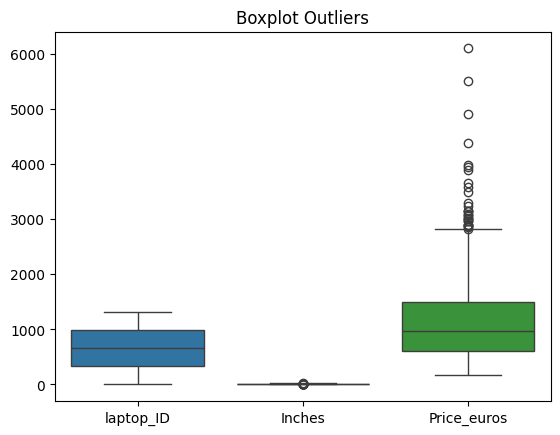

In [2312]:
# Visualisasi Outliers
sns.boxplot(data=df_raw[numeric_cols])
plt.title('Boxplot Outliers')
plt.show()


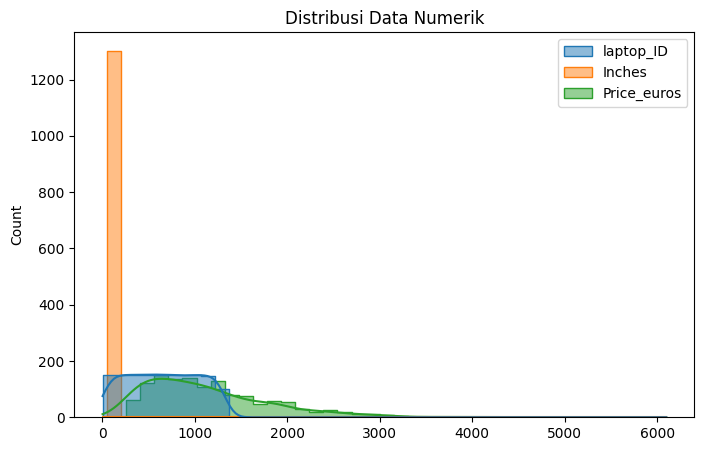

,Skewness,Mean,Median,Mode
laptop_ID,0.004766,660.155794,659.0,1.0
Inches,-0.446913,15.017191,15.6,15.6
Price_euros,1.520866,1123.686992,977.0,1099.0


In [2313]:
# Tampilkan Visualisasi Distribusi Data Numerik
plt.figure(figsize=(8, 5))
sns.histplot(data=df_raw[numeric_cols], bins=40, kde=True,
             element="step", multiple="dodge", legend=True)
plt.title("Distribusi Data Numerik")
plt.show()
np.mean
# Tampilkan Tabel Distribusi Data Numerik
Data_Distribusi_Table = pd.DataFrame({
    'Skewness': df_raw[numeric_cols].skew(),
    'Mean': df_raw[numeric_cols].mean(),
    'Median': df_raw[numeric_cols].median(),
    'Mode': df_raw[numeric_cols].mode().iloc[0]
})
display(Data_Distribusi_Table)

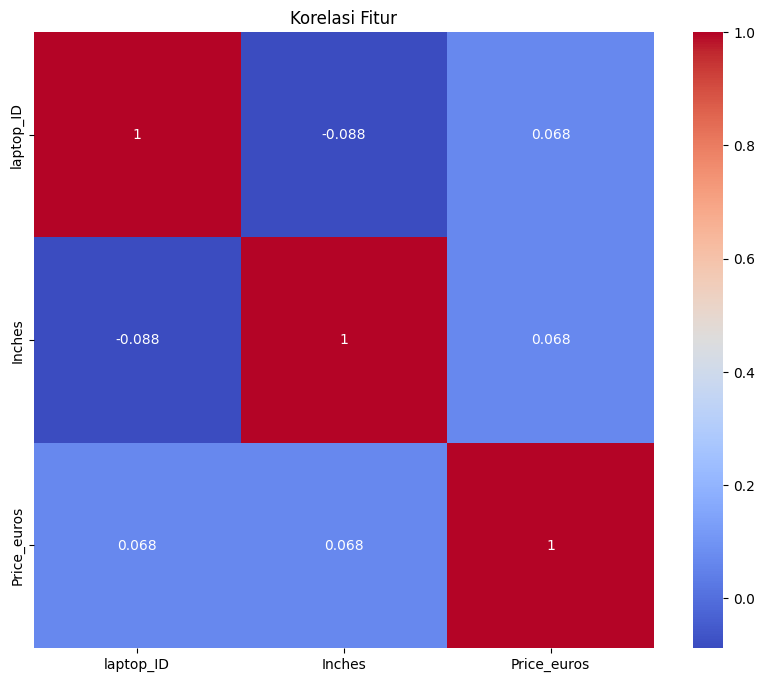

In [2314]:
# Visualisasi Korelasi Fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df_raw[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

# ***DATA PROCESSING***

###**FIRST DATA CLEANSING**

In [2315]:
# Gunakan Copy Data Raw
df_clean = df_raw.copy()

In [2316]:
df_clean.duplicated().sum()

np.int64(0)

In [2317]:
# Outliers Handling With Capping
for col in ["Inches", "Price_euros"]:
    lower = lower_outlier[col] # Lower Outlier for colomn
    upper = upper_outlier[col] # Upper Outlier for colomn
    df_clean[col] = np.where(df_clean[col] < lower, lower,
                             np.where(df_clean[col] > upper, upper,
                                      df_clean[col]))

,Outliers
laptop_ID,0
Inches,0
Price_euros,0


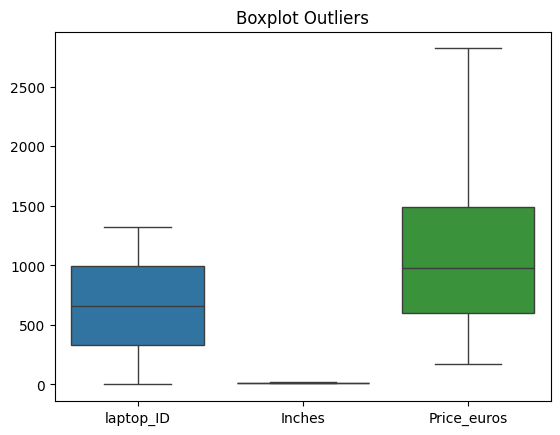

In [2318]:
# Lihat Hasil Outliers Handling
df_clean_outliers = (df_clean[numeric_cols] < lower_outlier) | (df_clean[numeric_cols] > upper_outlier)
clean_outliers_per_col = df_clean_outliers.sum()
Outlier_table = pd.DataFrame(clean_outliers_per_col, columns=['Outliers'])
display(Outlier_table)

sns.boxplot(data=df_clean[numeric_cols])
plt.title('Boxplot Outliers')
plt.show()

In [2319]:
# String Cleansing
df_clean["laptop_ID"] = df_clean["laptop_ID"].astype(str).str.replace("DY", "").astype(float)
df_clean["Ram"] = df_clean["Ram"].astype(str).str.replace("GB", "").astype(float)
df_clean["Weight"] = df_clean["Weight"].astype(str).str.replace("kg", "").astype(float)
df_clean['Inches'] = df_clean['Inches'].astype(float)

In [2320]:
# Hasil Cleansing
df_clean

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2.0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3.0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4.0,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316.0,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,1317.0,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,1318.0,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319.0,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


## FEATURE ENGINEERING

### FEATURE EXTRACTION

In [2321]:
# EKSTRAKS FITUR MEMORY
def convert_to_gb(mem_str):
    if 'TB' in mem_str:
        return float(mem_str.replace('TB','')) * 1024
    else:
        return float(mem_str.replace('GB',''))

def extract_memory_features(mem_column):
    ssd = []
    hdd = []
    total = []

    for val in mem_column:
        ssd_size = 0
        hdd_size = 0

        if isinstance(val, str):
            parts = val.split('+')
            for part in parts:
                part = part.strip()
                size = convert_to_gb(part.split()[0])
                if 'SSD' in part:
                    ssd_size += size
                elif 'HDD' in part:
                    hdd_size += size

        ssd.append(ssd_size)
        hdd.append(hdd_size)
        total.append(ssd_size + hdd_size)

    return pd.DataFrame({
        'SSD_GB': ssd,
        'HDD_GB': hdd,
        'Total_Memory_GB': total
    })

memory_features = extract_memory_features(df_clean['Memory'])
df_clean = pd.concat([df_clean, memory_features], axis=1)

# EKSTRAK FITUR GPU
def extract_gpu_brand(gpu_str):
    if 'Nvidia' in gpu_str or 'NVIDIA' in gpu_str:
        return 'Nvidia'
    elif 'AMD' in gpu_str:
        return 'AMD'
    elif 'Intel' in gpu_str:
        return 'Intel'
    else:
        return 'Unknown'

df_clean['GPU_Brand'] = df_clean['Gpu'].apply(extract_gpu_brand)

# EKSTRAK FITUR CPU
def extract_cpu_brand(cpu_str):
    if 'Intel' in cpu_str:
        return 'Intel'
    elif 'AMD' in cpu_str:
        return 'AMD'
    else:
        return 'Unknown'

def extract_cpu_type(cpu_str):
    if 'i3' in cpu_str or 'I3' in cpu_str:
        return 'i3'
    elif 'i5' in cpu_str or 'I5' in cpu_str:
        return 'i5'
    elif 'i7' in cpu_str or 'I7' in cpu_str:
        return 'i7'
    elif 'Ryzen 3' in cpu_str:
        return 'Ryzen 3'
    elif 'Ryzen 5' in cpu_str:
        return 'Ryzen 5'
    elif 'Ryzen 7' in cpu_str:
        return 'Ryzen 7'
    else:
        return 'Other'

df_clean['CPU_Brand'] = df_clean['Cpu'].apply(extract_cpu_brand) # Gabungkan Fitur
df_clean['CPU_Type'] = df_clean['Cpu'].apply(extract_cpu_type)

# Lihat Hasil Ekstrak CPU ,GPU DAN MEMORY
df_clean[['Memory', 'SSD_GB', 'HDD_GB', 'Total_Memory_GB', 'Gpu', 'GPU_Brand', 'Is_Dedicated_GPU', 'Cpu', 'CPU_Brand', 'CPU_Type']].nunique()


,0
Memory,39
SSD_GB,12
HDD_GB,6
Total_Memory_GB,21
Gpu,110
GPU_Brand,4
Is_Dedicated_GPU,2
Cpu,118
CPU_Brand,3
CPU_Type,4


In [2322]:
# Fungsi ekstraksi fitur dari ScreenResolution
def extract_features(ScreenResolution):
    # Ekstraksi resolusi
    match = re.search(r'(\d{3,4})x(\d{3,4})', ScreenResolution)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    else:
        width, height = None, None

    # Cek IPS Panel
    ips_panel = 1 if 'IPS Panel' in ScreenResolution or 'IPS' in ScreenResolution else 0

    # Cek Touchscreen
    touchscreen = 1 if 'Touchscreen' in ScreenResolution else 0

    # Raw resolution type untuk disimplifikasi nanti
    raw_res_type = ScreenResolution

    return pd.Series([width, height, ips_panel, touchscreen, raw_res_type])

# Terapkan fungsi ke DataFrame
df_clean[['Width', 'Height', 'IPS Panel', 'Touchscreen', 'Resolution_Type']] = df_clean['ScreenResolution'].apply(extract_features)

# Fungsi penyederhanaan resolusi
def simplify_resolution_type(res_type):
    res_type = res_type.lower()
    if '4k' in res_type or 'ultra' in res_type:
        return '4K'
    elif 'full hd' in res_type or '1920x1080' in res_type:
        return 'Full HD'
    elif 'hd' in res_type or '1366x768' in res_type:
        return 'HD'
    elif 'retina' in res_type:
        return 'Retina'
    else:
        return 'Other'

# Terapkan simplifikasi
df_clean['Resolution_Type'] = df_clean['Resolution_Type'].apply(simplify_resolution_type)

# Cek hasil
print(df_clean['Resolution_Type'].value_counts())


Resolution_Type
Full HD    846
HD         337
Other       60
4K          43
Retina      17
Name: count, dtype: int64


In [2323]:
# Fitur Ekstrak Aspek Ratio
df_clean['Aspect_Ratio'] = df_clean['Width'] / df_clean['Height']
df_clean['Aspect_Ratio']

,Aspect_Ratio
0,1.600000
1,1.600000
2,1.777778
3,1.600000
4,1.600000
...,...
1298,1.777778
1299,1.777778
1300,1.778646
1301,1.778646


In [2324]:
df_clean = df_clean.drop(columns=["Memory","Gpu","Cpu","laptop_ID","ScreenResolution","Is_Dedicated_GPU"])
df_clean

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SSD_GB,HDD_GB,Total_Memory_GB,GPU_Brand,CPU_Brand,CPU_Type,Width,Height,IPS Panel,Touchscreen,Resolution_Type,Aspect_Ratio
0,Apple,MacBook Pro,Ultrabook,13.3,8.0,macOS,1.37,1339.69,128.0,0.0,128.0,Intel,Intel,i5,2560,1600,1,0,Retina,1.600000
1,Apple,Macbook Air,Ultrabook,13.3,8.0,macOS,1.34,898.94,0.0,0.0,0.0,Intel,Intel,i5,1440,900,0,0,Other,1.600000
2,HP,250 G6,Notebook,15.6,8.0,No OS,1.86,575.00,256.0,0.0,256.0,Intel,Intel,i5,1920,1080,0,0,Full HD,1.777778
3,Apple,MacBook Pro,Ultrabook,15.4,16.0,macOS,1.83,2537.45,512.0,0.0,512.0,AMD,Intel,i7,2880,1800,1,0,Retina,1.600000
4,Apple,MacBook Pro,Ultrabook,13.3,8.0,macOS,1.37,1803.60,256.0,0.0,256.0,Intel,Intel,i5,2560,1600,1,0,Retina,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4.0,Windows 10,1.80,638.00,128.0,0.0,128.0,Intel,Intel,i7,1920,1080,1,1,Full HD,1.777778
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16.0,Windows 10,1.30,1499.00,512.0,0.0,512.0,Intel,Intel,i7,3200,1800,1,1,HD,1.777778
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2.0,Windows 10,1.50,229.00,0.0,0.0,0.0,Intel,Intel,Other,1366,768,0,0,HD,1.778646
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6.0,Windows 10,2.19,764.00,0.0,1024.0,1024.0,AMD,Intel,i7,1366,768,0,0,HD,1.778646


### SECOND DATA CLEANSING

In [2325]:
# Kelompokkkan Fitur Ektraksi Ke Numerik dan Kategorik
new_num = ["Ram", "SSD_GB","HDD_GB","Total_Memory_GB",'IPS Panel', 'Touchscreen',"Aspect_Ratio","Width","Height" ] # Remove duplicate "Width" and "Height"
new_cat = ["TypeName","OpSys", "GPU_Brand", "CPU_Brand", "CPU_Type","Resolution_Type"]

In [2326]:
# Tinjau Kondisi Values

# ---- IQR -------------------------------
q1 = df_clean[new_num].quantile(0.25)
q3 = df_clean[new_num].quantile(0.75)
iqr = q3 - q1

# Outliers Parameter
lower_outlier = q1 - (1.5 * iqr)
upper_outlier = q3 + (1.5 * iqr)
# ----------------------------------------


# Outliers Values
df_clean_outliers = (df_clean[new_num] < lower_outlier) | (df_clean[new_num] > upper_outlier)
clean_outliers_per_col = df_clean_outliers.sum()

# Null Values
df_clean_null = df_clean[new_num].isnull().sum()
# Uniques Values
df_clean_uniques = df_clean[new_num].nunique()
# Duplicated Values
df_clean_duplicated = df_clean[new_num].duplicated().sum()

# DataFrame Untuk Tiap Tipe kondisi Values
df_clean_values = pd.DataFrame({
    'Null Values': df_clean_null,
    'Unique Values': df_clean_uniques,
    'Outliers': clean_outliers_per_col,
})
df_clean_values


,Null Values,Unique Values,Outliers
Ram,0,9,221
SSD_GB,0,12,18
HDD_GB,0,6,0
Total_Memory_GB,0,21,13
IPS Panel,0,2,0
Touchscreen,0,2,192
Aspect_Ratio,0,4,346
Width,0,13,104
Height,0,10,122


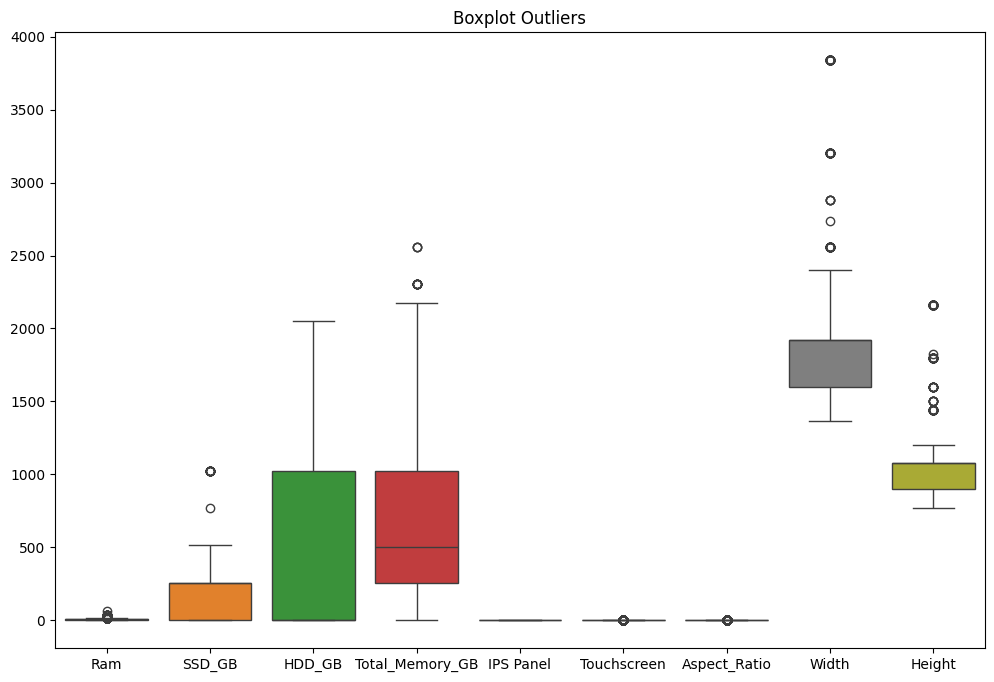

In [2327]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean[new_num])
plt.title('Boxplot Outliers')
plt.show()

In [2328]:
# Outliers Handling With Capping
for col in df_clean[new_num]:
    lower = lower_outlier[col] # Lower Outlier for colomn
    upper = upper_outlier[col] # Upper Outlier for colomn
    df_clean[col] = np.where(df_clean[col] < lower, lower,
                             np.where(df_clean[col] > upper, upper,
                                      df_clean[col]))

,Outliers
Ram,0
SSD_GB,0
HDD_GB,0
Total_Memory_GB,0
IPS Panel,0
Touchscreen,0
Aspect_Ratio,0
Width,0
Height,0


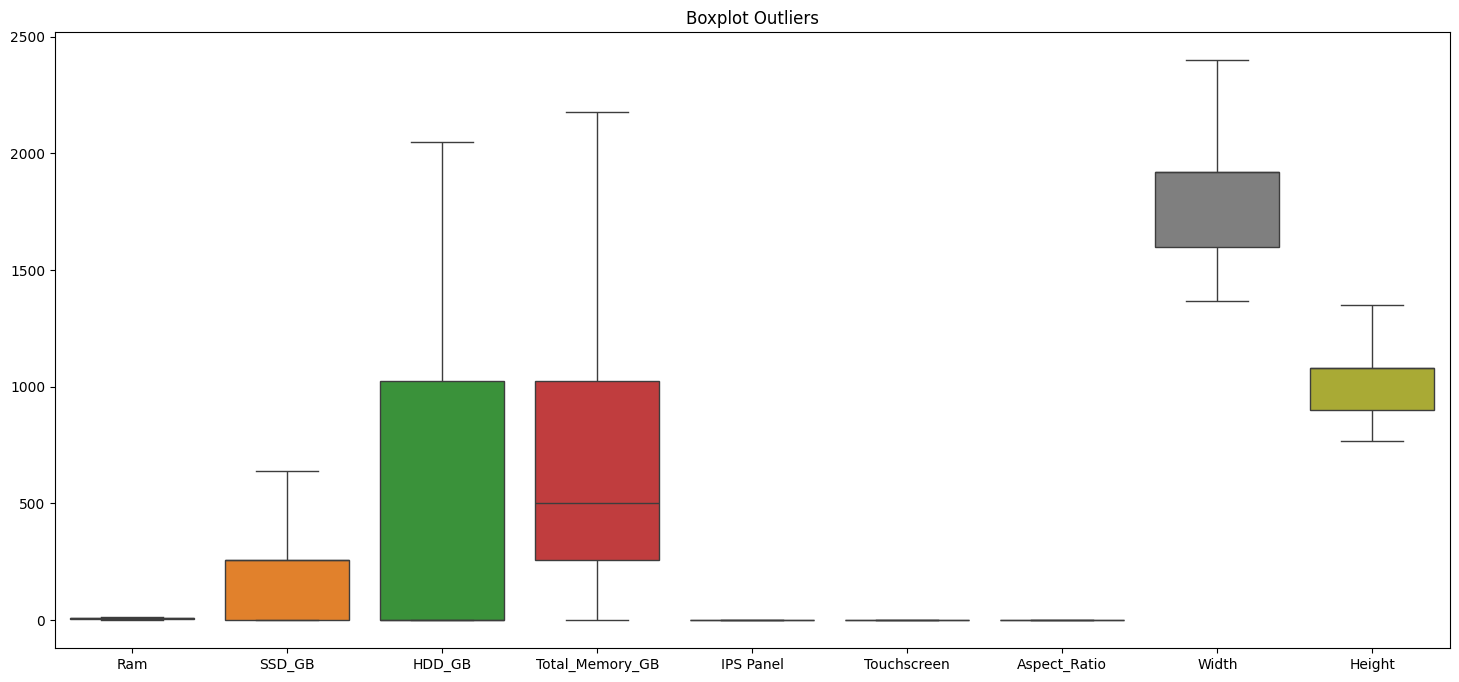

In [2329]:
# Lihat Hasil Outliers Handling
df_clean_new_outliers = (df_clean[new_num] < lower_outlier) | (df_clean[new_num] > upper_outlier)
new_clean_outliers_per_col = df_clean_new_outliers.sum()
new_Outlier_table = pd.DataFrame(new_clean_outliers_per_col, columns=['Outliers'])
display(new_Outlier_table)

plt.figure(figsize=(18, 8))
sns.boxplot(data=df_clean[new_num])
plt.title('Boxplot Outliers')
plt.show()

### DATA SPLIT

In [2330]:
# Pisahkan Fitur dan Target
x = df_clean.drop(columns=["Price_euros"]) # Fitur
y = df_clean["Price_euros"] # Target
# Cek Dimensi
x.shape , y.shape

((1303, 19), (1303,))

In [2331]:
# Cek Data Type
print(f"{x.info()}\n")
print(f"{y.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   Product          1303 non-null   object 
 2   TypeName         1303 non-null   object 
 3   Inches           1303 non-null   float64
 4   Ram              1303 non-null   float64
 5   OpSys            1303 non-null   object 
 6   Weight           1303 non-null   float64
 7   SSD_GB           1303 non-null   float64
 8   HDD_GB           1303 non-null   float64
 9   Total_Memory_GB  1303 non-null   float64
 10  GPU_Brand        1303 non-null   object 
 11  CPU_Brand        1303 non-null   object 
 12  CPU_Type         1303 non-null   object 
 13  Width            1303 non-null   float64
 14  Height           1303 non-null   float64
 15  IPS Panel        1303 non-null   float64
 16  Touchscreen      1303 non-null   float64
 17  Resolution_Typ

In [2332]:
# Pisahkan Kolom Numerik dan Kategorik
numeric_cols_clean = x.select_dtypes(include=['float64',"int64"]).columns
categoric_cols_clean = x.select_dtypes(include='object').columns
print(f"Numeric Columns: {numeric_cols_clean}\n")
print(f"Categoric Columns: {categoric_cols_clean}")

Numeric Columns: Index(['Inches', 'Ram', 'Weight', 'SSD_GB', 'HDD_GB', 'Total_Memory_GB',
       'Width', 'Height', 'IPS Panel', 'Touchscreen', 'Aspect_Ratio'],
      dtype='object')

Categoric Columns: Index(['Company', 'Product', 'TypeName', 'OpSys', 'GPU_Brand', 'CPU_Brand',
       'CPU_Type', 'Resolution_Type'],
      dtype='object')


In [2333]:
# Lakukan Split Data Train dan Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [2334]:
# Tampilkan Data Train dan Test
print(f"Jumlah Data Fitur  (x)  Train: {len(x_train)}")
print(f"Jumlah Data Fitur  (x)  Test : {len(x_test)}")
print(f"Jumlah Data Target (y)  Train: {len(y_train)}")
print(f"Jumlah Data Target (y)  Test : {len(y_test)}")



Jumlah Data Fitur  (x)  Train: 1042
Jumlah Data Fitur  (x)  Test : 261
Jumlah Data Target (y)  Train: 1042
Jumlah Data Target (y)  Test : 261


<ipython-input-2335-9878959bd60d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette=colors)


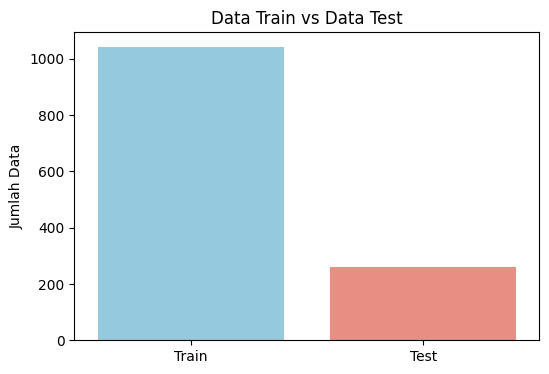

In [2335]:
# Visualisasi Data Train dan Test
plt.figure(figsize=(6,4))
sizes = [len(x_train), len(x_test)]
labels = ['Train', 'Test']
colors = ['skyblue', 'salmon']
sns.barplot(x=labels, y=sizes, palette=colors)
plt.title('Data Train vs Data Test')
plt.ylabel('Jumlah Data')
plt.show()


### SCALING DAN ENCODING

In [2336]:
# Encoder
ohe = OneHotEncoder(handle_unknown='ignore')
hs = ce.HashingEncoder(n_components=16)
# Scaler
std = StandardScaler()
rbs = RobustScaler()


In [2337]:
# Kelompokkan Fitur Berdasar Penanganan Encoding dan Scaling
numerical_pass_features = ['Inches', 'Weight', 'Ram','Total_Memory_GB',"SSD_GB","HDD_GB",'Aspect_Ratio',"Width","Height"]
binary_features = ["IPS Panel","Touchscreen"]
ohe_features = ['OpSys', 'GPU_Brand', 'CPU_Brand', 'CPU_Type',"Resolution_Type","TypeName"]
hs_features = ["Product",'Company']

In [2338]:
# Pipeline Scaler dan Encoder

hs_pipeline = Pipeline([
    ('hs', hs)
])


ohe_pipeline = Pipeline([
    ('ohe', ohe)
])




In [2339]:
# Pipeline Feature Engineering
feature_engineering_pipeline = ColumnTransformer(
    transformers=[
        ('ohe_features', ohe_pipeline, ohe_features),
        ('hash_features', hs_pipeline, hs_features),
        ('binary_features', 'passthrough', binary_features),
        ('numeric_features', 'passthrough', numerical_pass_features)
    ],
    remainder="passthrough")

# MODELING

In [2340]:
# Pipeline Modeling
modeling_pipeline = Pipeline(steps=[
    ('Feature Engineering', feature_engineering_pipeline),
    ('CatBoostRegressor', CatBoostRegressor(
    iterations=4000,
    depth=5,
    learning_rate=0.0121 ,
    l2_leaf_reg=3,
    bagging_temperature=0.8,
    random_seed=42,
    early_stopping_rounds=200,
    verbose=1000))
])

modeling_pipeline.fit(x_train, y_train)

0:	learn: 647.5328507	total: 3.62ms	remaining: 14.5s
1000:	learn: 210.9738497	total: 2.94s	remaining: 8.8s
2000:	learn: 165.6514727	total: 5.42s	remaining: 5.41s
3000:	learn: 139.9370530	total: 8.91s	remaining: 2.96s
3999:	learn: 122.8467772	total: 11.7s	remaining: 0us


Pipeline(steps=[('Feature Engineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_features',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['OpSys', 'GPU_Brand',
                                                   'CPU_Brand', 'CPU_Type',
                                                   'Resolution_Type',
                                                   'TypeName']),
                                                 ('hash_features',
                                                  Pipeline(steps=[('hs',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=16))]),
                                                  ['Product', 'Company']),
                                                 ('binary_features',
                                                  'passthrough',
                                                  ['IPS Panel', 'Touchscreen']),
                                                 ('numeric_features',
                                                  'passthrough',
                                                  ['Inches', 'Weight', 'Ram',
                                                   'Total_Memory_GB', 'SSD_GB',
                                                   'HDD_GB', 'Aspect_Ratio',
                                                   'Width', 'Height'])])),
                ('CatBoostRegressor',
                 <catboost.core.CatBoostRegressor object at 0x7ed5806fb6d0>)])

# MODEL EVALUASI

In [2341]:
y_pred_test = modeling_pipeline.predict(x_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("EVALUASI TEST :")
print(f"R2 Score  : {r2_test}")
print(f"MSE Score : {mse_test}")
print(f"MAE Score : {mae_test}")
print(f"MAPE Score: {mape_test}")

EVALUASI TEST :
R2 Score  : 0.8703098966834416
MSE Score : 47818.11001341827
MAE Score : 147.7645596608806
MAPE Score: 0.14757441212238845


In [2342]:
gap_predict = pd.DataFrame({
    'Actual': y_test.mean(),
    'Predicted': y_pred_test.mean()
},index=["Gap"])
gap_predict

,Actual,Predicted
Gap,1081.744444,1084.261953


# SAVE MODEL

In [2346]:
import joblib
joblib.dump(modeling_pipeline, 'model_laptop.pkl')

['model_laptop.pkl']